In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

sns.set_style('darkgrid')

In [4]:
## read the dataset 

df = pd.read_csv('income_evaluation.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
## check null values in dataset

df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [7]:
df.shape

(32561, 15)

In [8]:
df.columns = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', 'race', 'sex',
             'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country', 'income']

In [9]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
## converting income columns to 0's and 1's {0 for salary <=50K and 1 for salary >50K}
df['income'] = [1 if value == ' >50K' else 0 for value in df['income'].values]

In [12]:
## last 5 rows in dataset

df.tail()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [13]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
## removing ? from column workclass 
df['workclass'] = np.where(df.workclass == ' ?', np.nan, df['workclass'])

In [15]:
df.dropna(axis=0, inplace=True)

In [16]:
workclass_label = {v:k for k, v in enumerate(df.workclass.unique())}

In [17]:
workclass_label

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Self-emp-inc': 5,
 ' Without-pay': 6,
 ' Never-worked': 7}

In [22]:
df.workclass = df.workclass.map(workclass_label)

In [23]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [24]:
education_label = {v:k for k, v in enumerate(df.education.unique())}

In [25]:
education_label

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' Preschool': 13,
 ' 12th': 14,
 ' 1st-4th': 15}

In [26]:
df.education = df.education.map(education_label)

In [27]:
plt.figure(figsize=(10, 4))
sns.countplot(x='income', data=df, hue='sex');

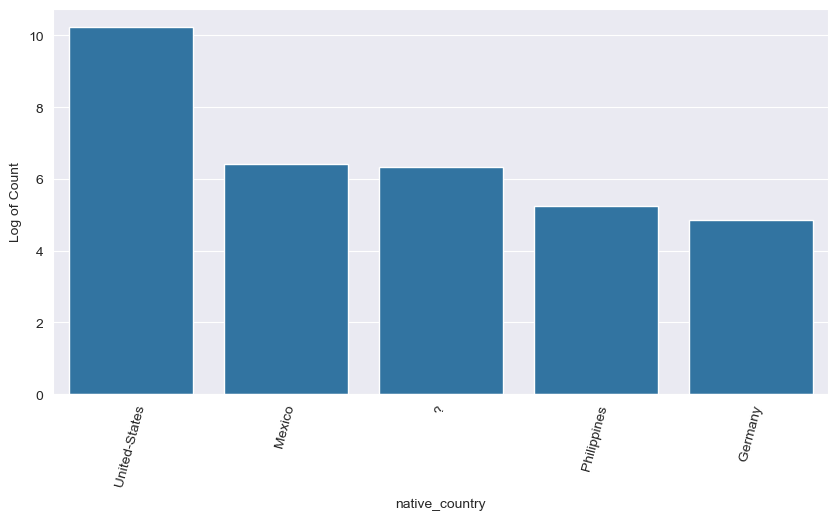

In [31]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(x=native_country.index, y=np.log(native_country))
plt.ylabel('Log of Count')
plt.show()

In [32]:
df.native_country = np.where(df.native_country == ' ?', np.nan, df['native_country'])

In [33]:
df.dropna(axis=0, inplace=True)

In [34]:
native_country = {v:k for k, v in enumerate(df.native_country.unique())}

In [35]:
df.native_country = df.native_country.map(native_country)

In [36]:
df.head()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,0
1,50,1,83311,0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,0
2,38,2,215646,1,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,0
3,53,2,234721,2,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,0
4,28,2,338409,0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,1,0


In [37]:
df.martial_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [38]:
marital_label = {v:k for k, v in enumerate(df.martial_status.unique())}

In [39]:
df.martial_status = df.martial_status.map(marital_label)

In [40]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [41]:
df.occupation = np.where(df.occupation == ' ?', np.nan, df['occupation'])

In [42]:
df.dropna(axis=0, inplace=True)

In [43]:
occ_label = {v:k for k, v in enumerate(df.occupation.unique())}

In [44]:
df.occupation = df.occupation.map(occ_label)

In [45]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [46]:
relationship_label = {v:k for k, v in enumerate(df.relationship.unique())}

In [47]:
df.relationship = df.relationship.map(relationship_label)

In [48]:
df.head()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,White,Male,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,White,Male,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,White,Male,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,Black,Male,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,Black,Female,0,0,40,1,0


In [49]:
df.sex = np.where(df.sex == ' Male', 1, 0)

In [50]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [51]:
race_label = {v:k for k, v in enumerate(df.race.unique())}

In [52]:
race_label

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [53]:
df.race = df.race.map(race_label)

In [54]:
df.head()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,0,1,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,1,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,1,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,1,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1,0


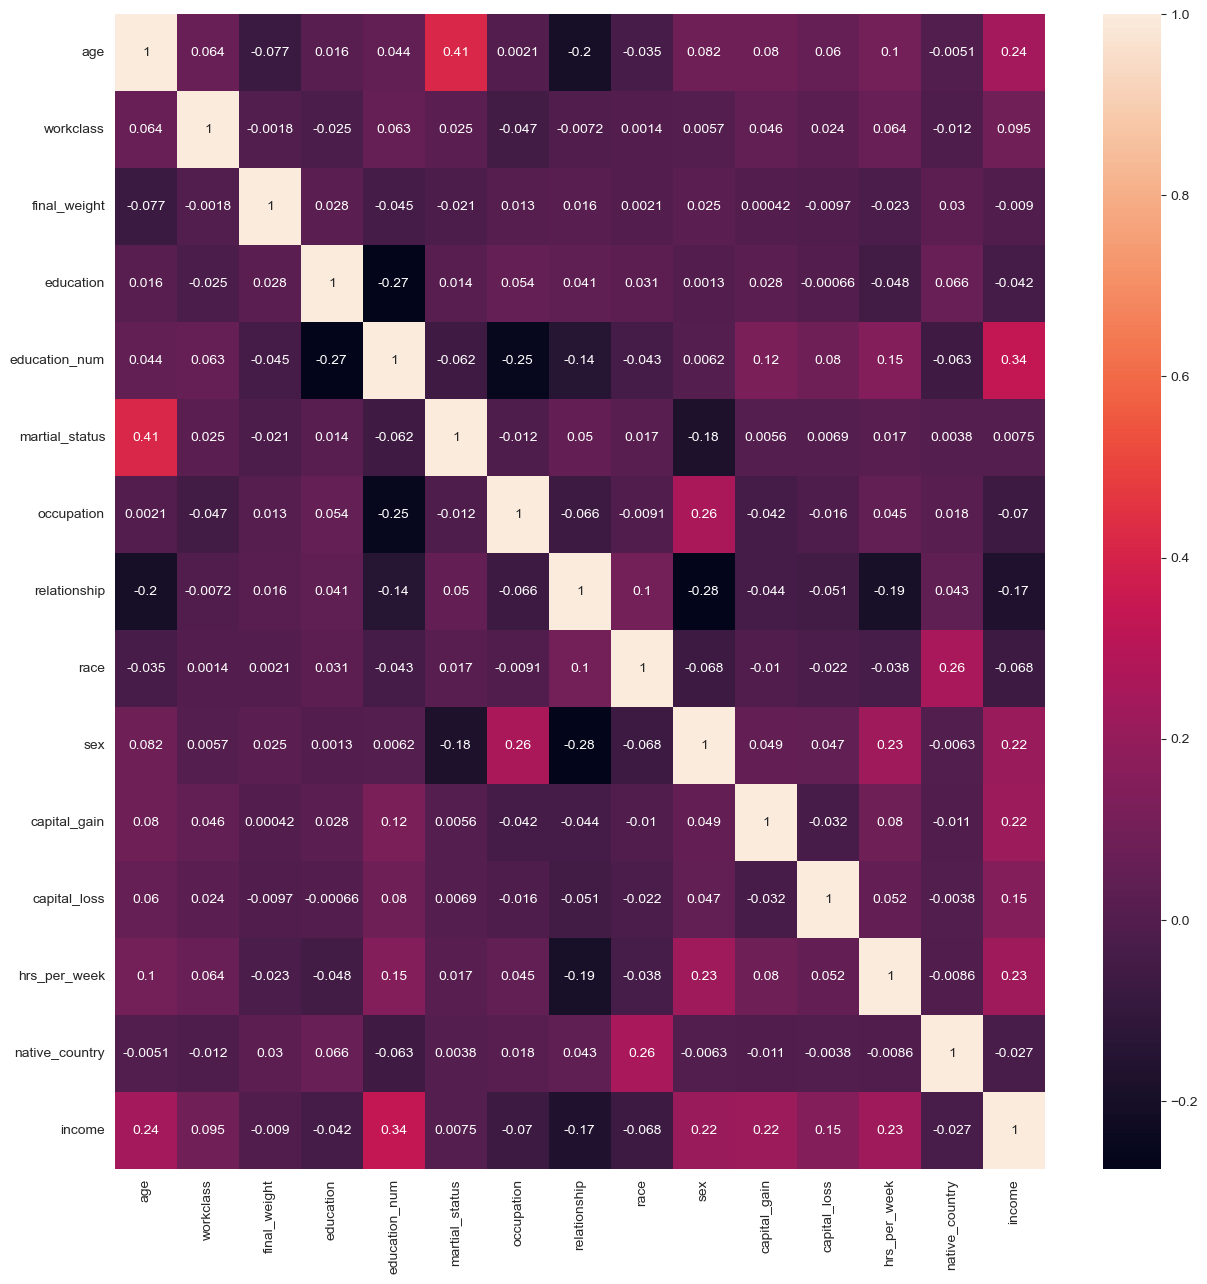

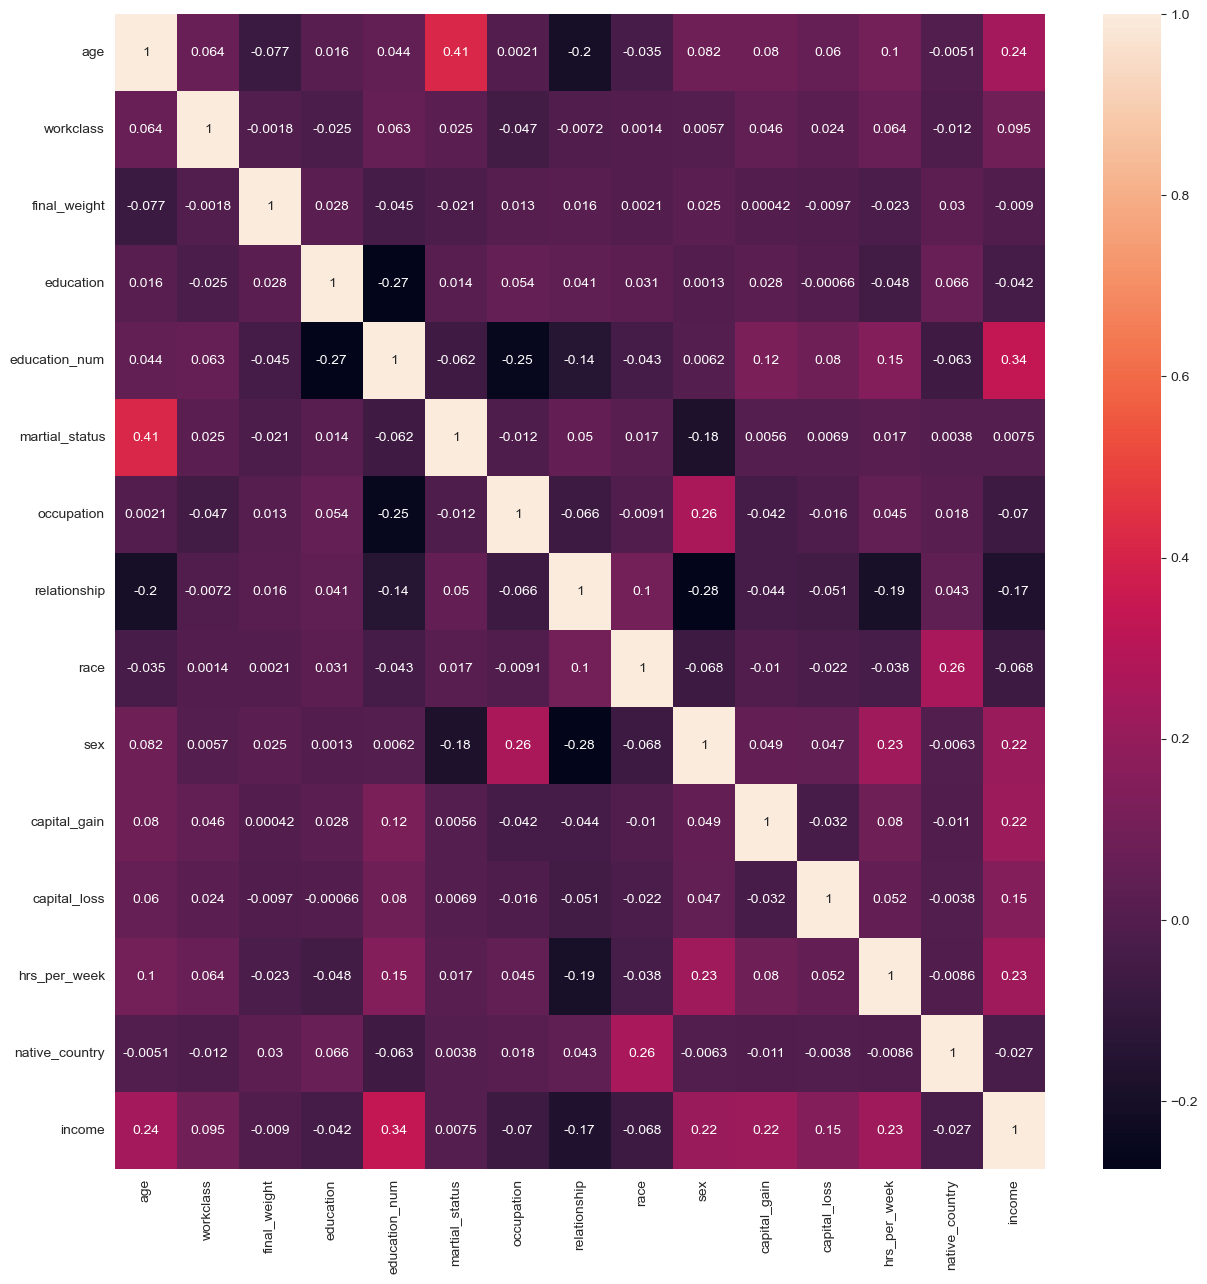

In [56]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [57]:
df.head()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,0,1,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,1,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,1,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,1,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1,0


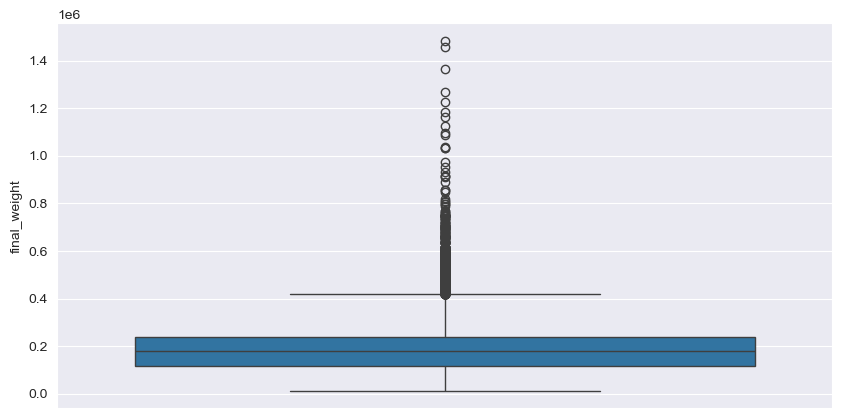

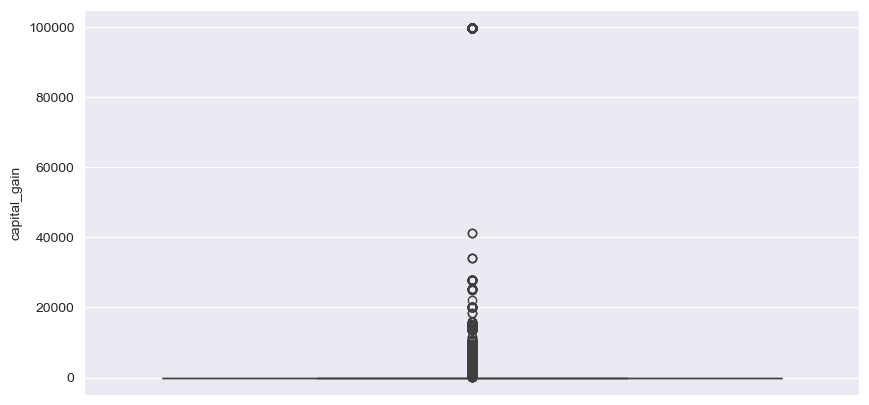

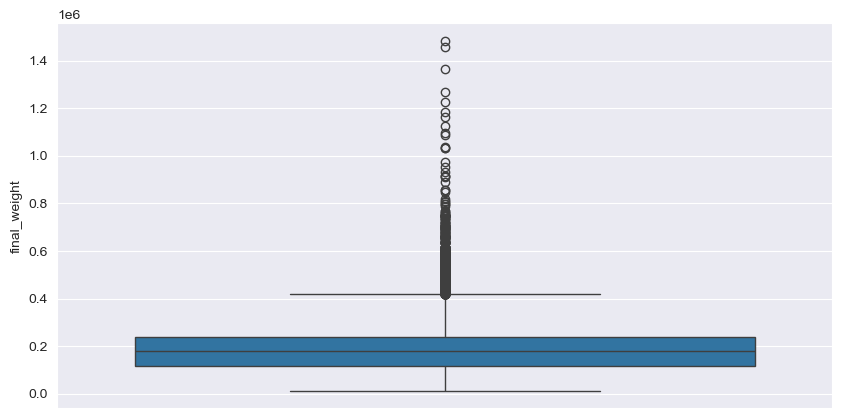

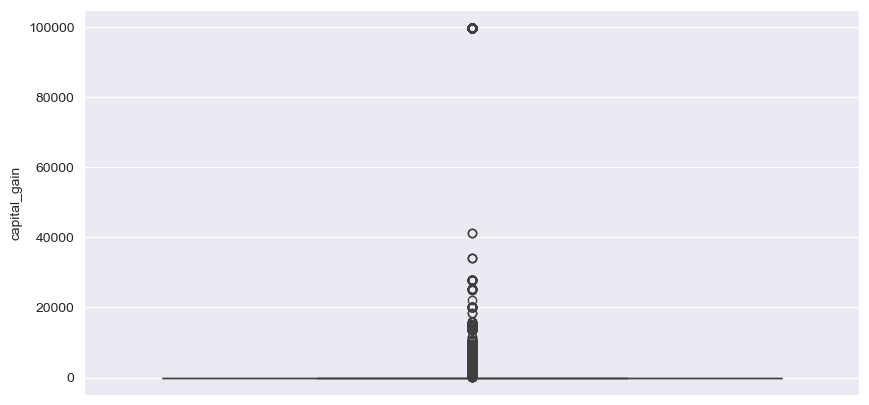

In [59]:
for feature in ['final_weight', 'capital_gain']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[feature])
    plt.show()

In [60]:
df.describe()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.109343,1.897938e+05,3.368842,10.121312,1.075061,4.615609,1.523971,0.211823,0.675685,1092.007858,88.372489,40.931238,1.183509,0.248922
std,13.134665,0.934785,1.056530e+05,3.404320,2.549995,1.217557,3.432195,1.431980,0.612461,0.468126,7406.346497,404.298370,11.979984,4.947070,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.000000,13.000000,1.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [63]:
X = X.values
y = y.values

sc = StandardScaler()
sc.fit_transform(X)

array([[ 0.04279571, -2.25653747, -1.0627216 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [ 0.88028814, -1.18675527, -1.00787131, ..., -0.21858598,
        -2.3315307 , -0.23923831],
       [-0.03333996, -0.11697307,  0.24469349, ..., -0.21858598,
        -0.07773411, -0.23923831],
       ...,
       [ 1.48937355, -0.11697307, -0.3585745 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [-1.25151078, -0.11697307,  0.11070545, ..., -0.21858598,
        -1.74721307, -0.23923831],
       [ 1.0325595 ,  3.09237353,  0.92884082, ..., -0.21858598,
        -0.07773411, -0.23923831]])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lg = LogisticRegression()

In [67]:
lg.fit(X_train, y_train)

C:\Users\amiglani\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
pred = lg.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);

--------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6767
           1       0.70      0.23      0.35      2282

    accuracy                           0.78      9049
   macro avg       0.74      0.60      0.61      9049
weighted avg       0.77      0.78      0.74      9049

------------------------------------------Accuracy Score---------------------------------------------------------
0.780970272958338
--------------------------------------------Confustion Matrix-----------------------------------------------------


In [72]:
from sklearn.metrics import accuracy_score

# Fit a basic model and check accuracy
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on training and test sets
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.8060559177809703


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8081555973035695
Random Forest Accuracy: 0.8541275279036358
SVM Accuracy: 0.7810807824068958
XGBoost Accuracy: 0.8697093601502929


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Output the results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')


Cross-validation scores: [0.85578972 0.8598153  0.84915937 0.85054477 0.85315017]
Mean CV score: 0.8536918633640213
